# Clasificación con Dataset Iris
# **Objetivo**: Predecir la especie de una flor (setosa, versicolor, virginica) basado en medidas de pétalos y sépalos.


🔍 Muestra de datos:
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   

   species  
0        0  
1        0  
2        0  

📊 Distribución de especies:
species
0    50
1    50
2    50
Name: count, dtype: int64


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128207 (\N{STRAIGHT RULER}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


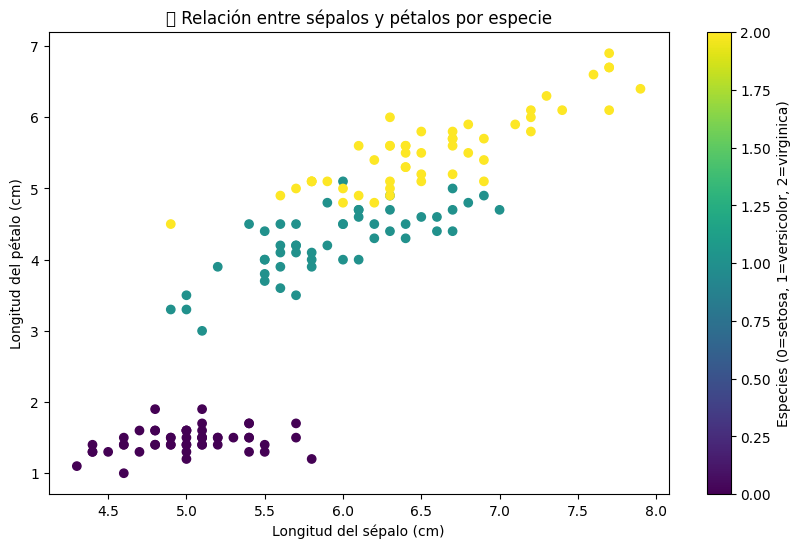


📝 Reporte de clasificación:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      0.90      0.95        10
   virginica       0.91      1.00      0.95        10

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



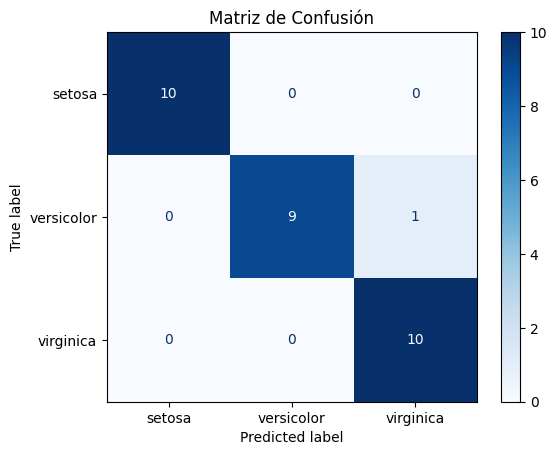


💡 Comparación clave con lo anterior:
- REGRESIÓN: Salida = número continuo (ej. precio casa)
- CLASIFICACIÓN: Salida = etiqueta discreta (ej. especie flor)
- Métricas: Accuracy/Precision vs. MSE/RMSE


In [5]:
#@title **Clasificación Multiclase con Dataset Iris** 🌸
#@markdown ## 1. Cargar y explorar datos
from sklearn.datasets import load_iris
import pandas as pd
import matplotlib.pyplot as plt

iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['species'] = iris.target  # 0=setosa, 1=versicolor, 2=virginica

print("🔍 Muestra de datos:")
print(df.head(3))

print("\n📊 Distribución de especies:")
print(df['species'].value_counts())

# Gráfico interactivo (solo en Colab)
plt.figure(figsize=(10, 6))
plt.scatter(
    df['sepal length (cm)'],
    df['petal length (cm)'],
    c=df['species'],
    cmap='viridis'
)
plt.xlabel("Longitud del sépalo (cm)")
plt.ylabel("Longitud del pétalo (cm)")
plt.title("📏 Relación entre sépalos y pétalos por especie")
plt.colorbar(label='Especies (0=setosa, 1=versicolor, 2=virginica)')
plt.show()

#@markdown ## 2. Entrenar modelo de clasificación
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

X = df[iris.feature_names]
y = df['species']

# División train/test
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y  # Mantiene proporción de clases
)

# Modelo de Regresión Logística (para multiclase)
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Evaluación
y_pred = model.predict(X_test)
print("\n📝 Reporte de clasificación:")
print(classification_report(y_test, y_pred, target_names=iris.target_names))

#@markdown ## 3. Visualizar matriz de confusión
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(
    confusion_matrix=cm,
    display_labels=iris.target_names
)
disp.plot(cmap='Blues')
plt.title("Matriz de Confusión")
plt.show()

#@markdown ## 🔄 Comparación con Regresión (para alumnos)
print("\n💡 Comparación clave con lo anterior:")
print("- REGRESIÓN: Salida = número continuo (ej. precio casa)")
print("- CLASIFICACIÓN: Salida = etiqueta discreta (ej. especie flor)")
print("- Métricas: Accuracy/Precision vs. MSE/RMSE")